<a href="https://colab.research.google.com/github/aadityadamle/Admit-Prediction/blob/master/Admit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/aadityadamle/Admit-Prediction/master/Admission_Predict_Ver1.1.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(500, 9)

In [5]:
data = data.dropna()

In [6]:
data.shape

(500, 9)

In [7]:
data.columns[0]

'Serial No.'

In [8]:
data.drop(data.columns[0],axis = 1, inplace = True)

In [9]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
X = data.iloc[:,:7]

In [12]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [13]:
Y = data.iloc[:,7:]

In [14]:
Y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 0)

In [16]:
classifier = LinearRegression()

In [17]:
classifier.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

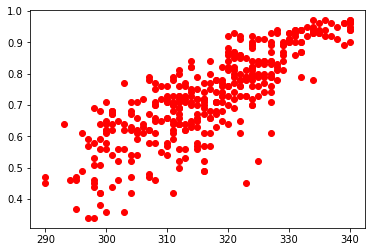

In [18]:
plt.scatter(X_train["GRE Score"],Y_train, color = "red")

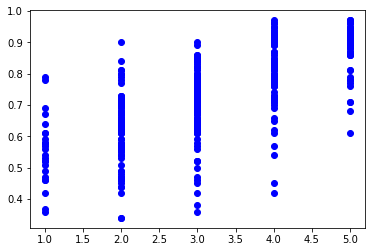

In [19]:
plt.scatter(X_train["University Rating"],Y_train, color = "blue")

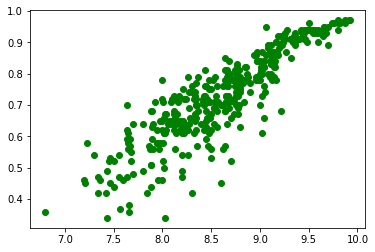

In [20]:
plt.scatter(X_train["CGPA"],Y_train, color = "green")

In [21]:
prediction_of_Y = classifier.predict(X_test)

In [22]:
prediction_of_Y

array([[0.65975096],
       [0.83294571],
       [0.77782128],
       [0.87880993],
       [0.60173406],
       [0.64502738],
       [0.53132327],
       [0.69353416],
       [0.52531517],
       [0.74728773],
       [0.612947  ],
       [0.70978457],
       [0.62315467],
       [0.75359963],
       [0.88362883],
       [0.51045588],
       [0.82256853],
       [0.64583472],
       [0.76625281],
       [0.53339105],
       [0.51516376],
       [0.72205954],
       [0.52044417],
       [0.92038429],
       [0.83305155],
       [0.72521724],
       [0.70065949],
       [0.50954091],
       [0.58288457],
       [0.59567607],
       [0.72610563],
       [0.48480355],
       [0.65293521],
       [0.839799  ],
       [0.56549766],
       [0.59542651],
       [0.84407308],
       [0.86619206],
       [0.59104477],
       [0.65947534],
       [0.66910836],
       [0.90058613],
       [0.86561785],
       [0.72146196],
       [0.77348686],
       [0.80604453],
       [0.96926279],
       [0.849

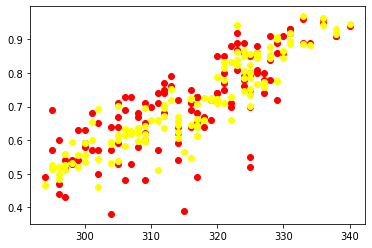

In [23]:
plt.scatter(X_test["GRE Score"],Y_test, color = "red")
plt.scatter(X_test["GRE Score"], prediction_of_Y, color='yellow')

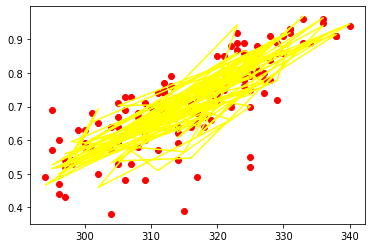

In [24]:
plt.scatter(X_test["GRE Score"],Y_test, color = "red")
plt.plot(X_test["GRE Score"], prediction_of_Y, color='yellow')

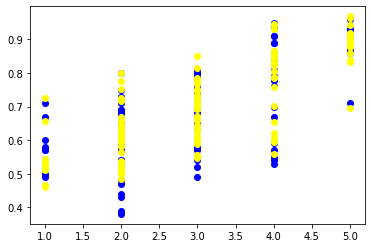

In [25]:
plt.scatter(X_test["University Rating"],Y_test, color = "blue")
plt.scatter(X_test["University Rating"], prediction_of_Y, color='yellow')

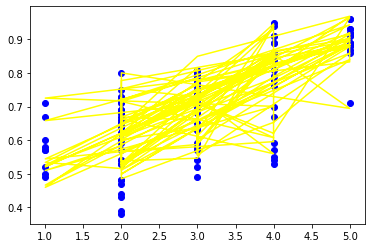

In [26]:
plt.scatter(X_test["University Rating"],Y_test, color = "blue")
plt.plot(X_test["University Rating"], prediction_of_Y, color='yellow')

In [27]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.80
